In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
 model.layers

In [16]:
model.layers[1].name

'dense_3'

In [17]:
model.get_layer('dense_3').name

'dense_3'

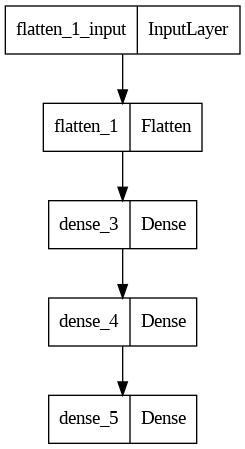

In [22]:
 keras.utils.plot_model(model)

In [30]:
weights = model.get_weights()
# weights

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7060 - accuracy: 0.7707 - val_loss: 0.4993 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4839 - accuracy: 0.8333 - val_loss: 0.4876 - val_accuracy: 0.8224
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4388 - accuracy: 0.8468 - val_loss: 0.4090 - val_accuracy: 0.8608
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4110 - accuracy: 0.8559 - val_loss: 0.3944 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3915 - accuracy: 0.8630 - val_loss: 0.3816 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3758 - accuracy: 0.8665 - val_loss: 0.3714 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3627 - accuracy: 0.8712 - val_loss: 0.3563 - val_accurac

<Axes: >

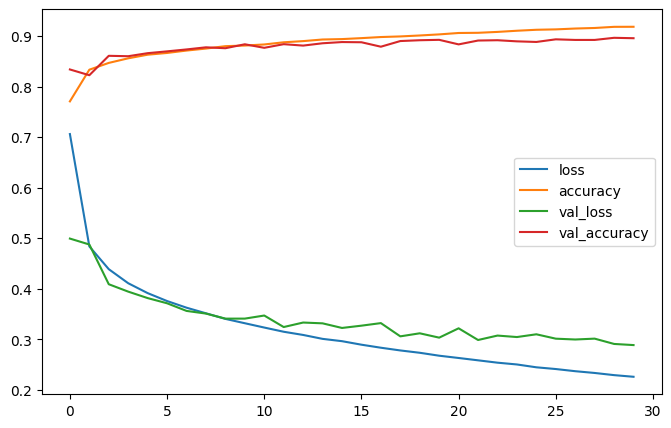

In [35]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.9759 - accuracy: 0.8376


[66.97589874267578, 0.8375999927520752]

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 159ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)